In [4]:
import pandas as pd

# 엑셀 파일에서 'KORmacro' 시트를 데이터프레임으로 읽어오기
file_path = 'python_data.xlsx'  # 파일 경로를 실제 경로로 수정
df = pd.read_excel(file_path, sheet_name='KORmacro')

# 데이터프레임 출력
print(df)

       date  rgdp  cd91       inf
0   2000/Q4  -0.3  6.97  2.508257
1   2001/Q1   1.2  5.95  3.627876
2   2001/Q2   1.3  5.78  4.919778
3   2001/Q3   1.4  4.97  4.158456
4   2001/Q4   1.8  4.58  3.244327
..      ...   ...   ...       ...
88  2022/Q4  -0.3  3.91  5.083054
89  2023/Q1   0.3  3.64  4.496285
90  2023/Q2   0.6  3.63  3.212650
91  2023/Q3   0.6  3.74  3.079117
92  2023/Q4   0.6  3.83  3.351061

[93 rows x 4 columns]


In [5]:
import pandas as pd
import urllib.request
import os

# Excel 파일 경로를 GitHub URL로 변경합니다.
file_path = "https://github.com/initialsw/lecture-jeju/raw/refs/heads/main/python_data.xlsx"
temp_file_path = "temp_python_data.xlsx" # 임시 파일 경로를 미리 정의합니다.

try:
    # URL에서 파일을 다운로드하고 로컬 임시 파일로 저장합니다.
    with urllib.request.urlopen(file_path) as response:
        with open(temp_file_path, 'wb') as f:
            f.write(response.read())

    # 임시 파일에서 'KORmacro' 시트의 데이터를 데이터프레임으로 읽어옵니다.
    df = pd.read_excel(temp_file_path, sheet_name="KORmacro")

    # 결과 데이터프레임을 출력합니다.
    print(df)

except Exception as e:
    print(f"오류 발생: {e}")
    print("URL에 접근하거나 파일을 읽는 중에 문제가 발생했습니다. URL을 확인하고, 네트워크 연결이 안정적인지 확인해주세요.")

finally:
    # 임시 파일을 삭제합니다.
    if os.path.exists(temp_file_path):
        os.remove(temp_file_path)

       date  rgdp  cd91       inf
0   2000/Q4  -0.3  6.97  2.508257
1   2001/Q1   1.2  5.95  3.627876
2   2001/Q2   1.3  5.78  4.919778
3   2001/Q3   1.4  4.97  4.158456
4   2001/Q4   1.8  4.58  3.244327
..      ...   ...   ...       ...
88  2022/Q4  -0.3  3.91  5.083054
89  2023/Q1   0.3  3.64  4.496285
90  2023/Q2   0.6  3.63  3.212650
91  2023/Q3   0.6  3.74  3.079117
92  2023/Q4   0.6  3.83  3.351061

[93 rows x 4 columns]


In [6]:
import pandas as pd

# 엑셀 파일에서 'KORmacro' 시트를 데이터프레임으로 읽어오기
file_path = 'python_data.xlsx'  # 파일 경로를 실제 경로로 수정
df = pd.read_excel(file_path, sheet_name='KORmacro')

# 'rgdp', 'cd91', 'inf' 칼럼에 대한 기본 통계량 계산
stats = df[['rgdp', 'cd91', 'inf']].describe()

# 통계량 출력
print(stats)

            rgdp       cd91        inf
count  93.000000  93.000000  93.000000
mean    0.853763   3.098065   2.475372
std     0.928013   1.478490   1.329724
min    -3.300000   0.650000   0.009041
25%     0.500000   1.650000   1.430760
50%     0.900000   2.860000   2.460686
75%     1.300000   4.170000   3.323224
max     3.000000   6.970000   5.676356


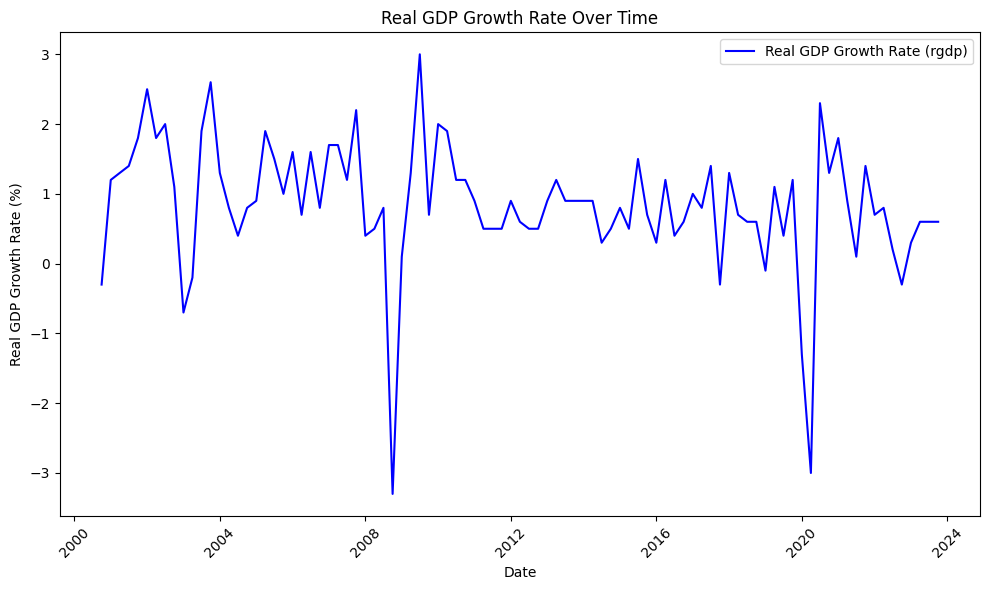

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 엑셀 파일에서 'KORmacro' 시트를 데이터프레임으로 읽어오기
file_path = 'python_data.xlsx'  # 파일 경로를 실제 경로로 수정
df = pd.read_excel(file_path, sheet_name='KORmacro')

# 'date' 열을 분기 단위에서 첫 번째 날짜로 변환
def convert_quarter_to_date(quarter):
    year, qtr = quarter.split('/Q')
    month = {'1': '01', '2': '04', '3': '07', '4': '10'}[qtr]
    return f"{year}-{month}-01"

df['date'] = df['date'].apply(convert_quarter_to_date)

# 'date' 열을 datetime 형식으로 변환
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# 'date'를 X축, 'rgdp'를 Y축으로 라인 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['rgdp'], label='Real GDP Growth Rate (rgdp)', color='blue')

# 그래프에 제목, X축, Y축 레이블 추가
plt.title('Real GDP Growth Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Real GDP Growth Rate (%)')

# X축에 날짜 레이블 회전 설정 (분기마다 겹치지 않도록)
plt.xticks(rotation=45)

# 그래프 표시
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipykernel_15658/66767585.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(df['date'], df['inf'], 'r-', label='CPI (inf)', color='red')


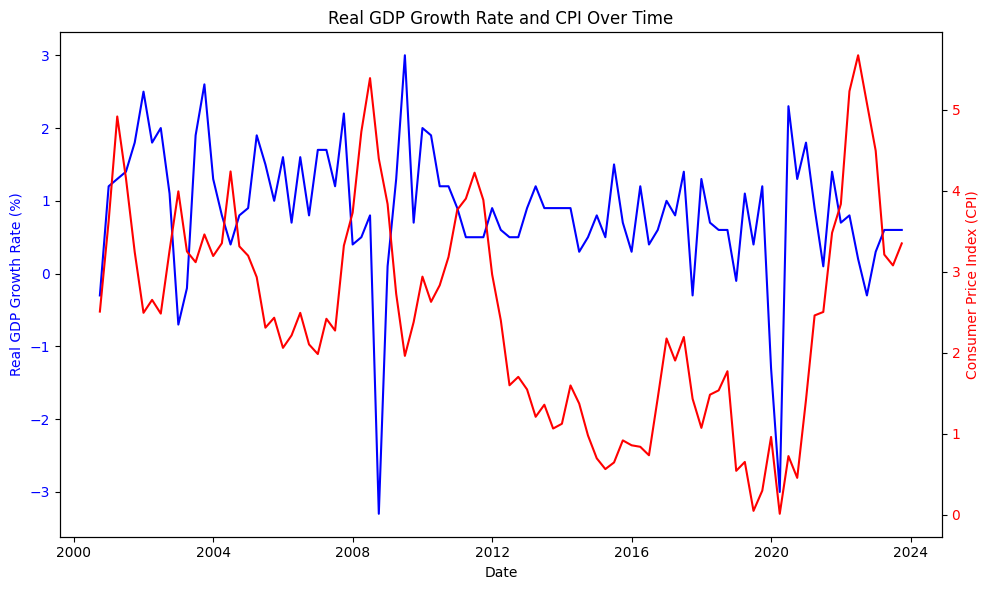

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 엑셀 파일에서 'KORmacro' 시트를 데이터프레임으로 읽어오기
file_path = 'python_data.xlsx'  # 파일 경로를 실제 경로로 수정
df = pd.read_excel(file_path, sheet_name='KORmacro')

# 'date' 열을 분기 단위에서 첫 번째 날짜로 변환
def convert_quarter_to_date(quarter):
    year, qtr = quarter.split('/Q')
    month = {'1': '01', '2': '04', '3': '07', '4': '10'}[qtr]
    return f"{year}-{month}-01"

df['date'] = df['date'].apply(convert_quarter_to_date)

# 'date' 열을 datetime 형식으로 변환
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# 그림 크기 설정
fig, ax1 = plt.subplots(figsize=(10, 6))

# 첫 번째 Y축 (rgdp) 라인 그래프
ax1.plot(df['date'], df['rgdp'], 'b-', label='Real GDP Growth Rate (rgdp)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Real GDP Growth Rate (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 Y축 (inf) 라인 그래프
ax2 = ax1.twinx()  # 두 번째 Y축 생성
ax2.plot(df['date'], df['inf'], 'r-', label='CPI (inf)', color='red')
ax2.set_ylabel('Consumer Price Index (CPI)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 그래프 제목과 레이블 추가
plt.title('Real GDP Growth Rate and CPI Over Time')

# X축 레이블 회전 설정 (분기마다 겹치지 않도록)
plt.xticks(rotation=45)

# 그래프 표시
fig.tight_layout()  # 그래프 레이아웃 자동 조정
plt.show()

                            AutoReg Model Results                             
Dep. Variable:                    inf   No. Observations:                   93
Model:                     AutoReg(4)   Log Likelihood                 -71.107
Method:               Conditional MLE   S.D. of innovations              0.538
Date:                Thu, 17 Apr 2025   AIC                            154.215
Time:                        20:22:47   BIC                            169.147
Sample:                             4   HQIC                           160.233
                                   93                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3368      0.131      2.580      0.010       0.081       0.593
inf.L1         1.0822      0.105     10.271      0.000       0.876       1.289
inf.L2        -0.0761      0.149     -0.509      0.6

/tmp/ipykernel_15658/2632581090.py:38: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  plt.plot(pd.date_range(start=df['date'].iloc[-1], periods=5, freq='Q')[1:], forecast, label='Forecasted CPI (inf)', color='red', linestyle='--')


ValueError: x and y must have same first dimension, but have shapes (4,) and (5,)

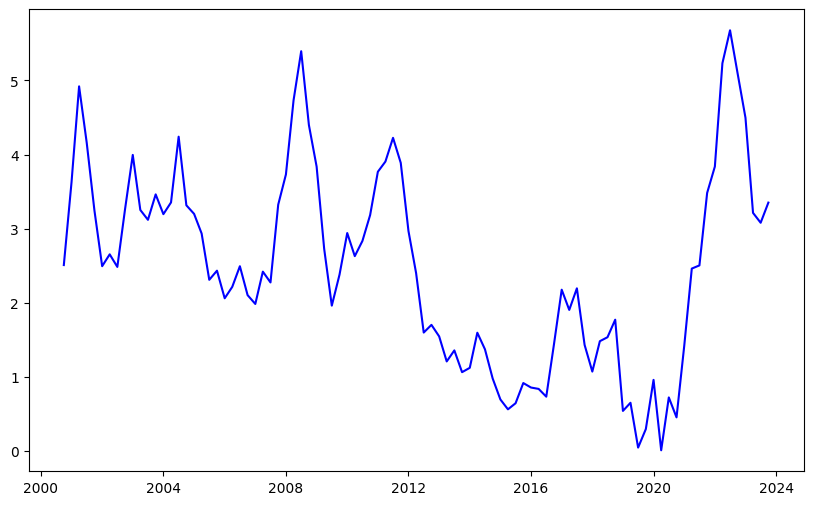

In [13]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# 엑셀 파일에서 'KORmacro' 시트를 데이터프레임으로 읽어오기
file_path = 'python_data.xlsx'  # 파일 경로를 실제 경로로 수정
df = pd.read_excel(file_path, sheet_name='KORmacro')

# 'date' 열을 분기 단위에서 첫 번째 날짜로 변환
def convert_quarter_to_date(quarter):
    year, qtr = quarter.split('/Q')
    month = {'1': '01', '2': '04', '3': '07', '4': '10'}[qtr]
    return f"{year}-{month}-01"

df['date'] = df['date'].apply(convert_quarter_to_date)

# 'date' 열을 datetime 형식으로 변환
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# 'inf' 열에 대해서 AR(4) 모델 추정
model = AutoReg(df['inf'], lags=4)  # lags=4로 AR(4) 모델 지정
model_fitted = model.fit()

# 모델 요약 출력
print(model_fitted.summary())

# 예측을 5단계 향후 시점에 대해 수행
forecast = model_fitted.predict(start=len(df), end=len(df)+4, dynamic=False)

# 예측 결과 출력
print("\nForecasted Values:")
print(forecast)

# 예측 결과 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['inf'], label='Observed CPI (inf)', color='blue')
plt.plot(pd.date_range(start=df['date'].iloc[-1], periods=5, freq='Q')[1:], forecast, label='Forecasted CPI (inf)', color='red', linestyle='--')

plt.title('CPI Forecast (AR(4) Model)')
plt.xlabel('Date')
plt.ylabel('Consumer Price Index (CPI)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                            AutoReg Model Results                             
Dep. Variable:                    inf   No. Observations:                   93
Model:                     AutoReg(4)   Log Likelihood                 -71.107
Method:               Conditional MLE   S.D. of innovations              0.538
Date:                Thu, 17 Apr 2025   AIC                            154.215
Time:                        20:23:43   BIC                            169.147
Sample:                             4   HQIC                           160.233
                                   93                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3368      0.131      2.580      0.010       0.081       0.593
inf.L1         1.0822      0.105     10.271      0.000       0.876       1.289
inf.L2        -0.0761      0.149     -0.509      0.6

/tmp/ipykernel_15658/1686524760.py:40: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_dates = pd.date_range(start=df['date'].iloc[-1], periods=6, freq='Q')[1:]


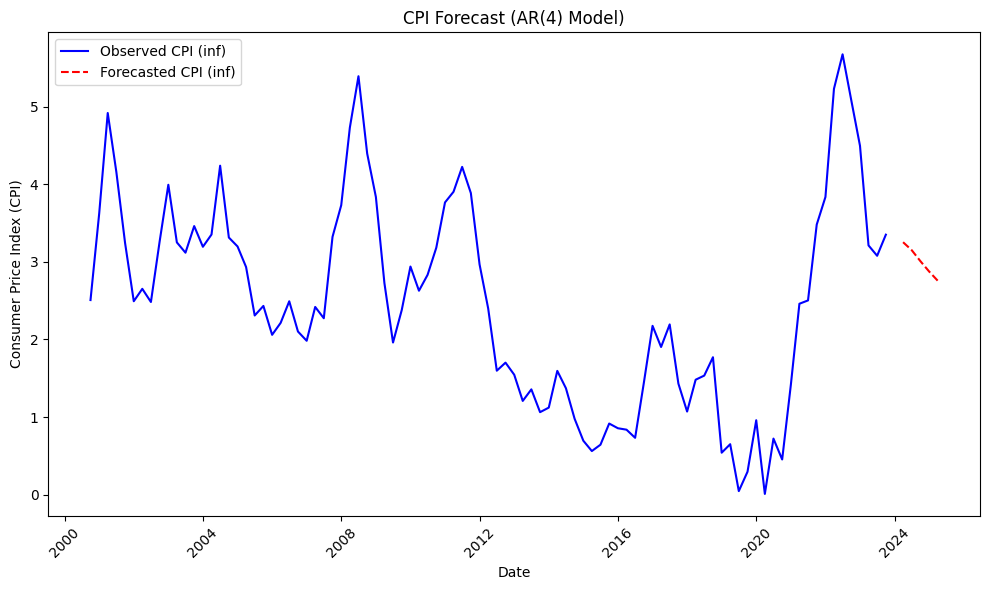

In [14]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# 엑셀 파일에서 'KORmacro' 시트를 데이터프레임으로 읽어오기
file_path = 'python_data.xlsx'  # 파일 경로를 실제 경로로 수정
df = pd.read_excel(file_path, sheet_name='KORmacro')

# 'date' 열을 분기 단위에서 첫 번째 날짜로 변환
def convert_quarter_to_date(quarter):
    year, qtr = quarter.split('/Q')
    month = {'1': '01', '2': '04', '3': '07', '4': '10'}[qtr]
    return f"{year}-{month}-01"

df['date'] = df['date'].apply(convert_quarter_to_date)

# 'date' 열을 datetime 형식으로 변환
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# 'inf' 열에 대해서 AR(4) 모델 추정
model = AutoReg(df['inf'], lags=4)  # lags=4로 AR(4) 모델 지정
model_fitted = model.fit()

# 모델 요약 출력
print(model_fitted.summary())

# 예측을 5단계 향후 시점에 대해 수행
forecast = model_fitted.predict(start=len(df), end=len(df)+4, dynamic=False)

# 예측 결과 출력
print("\nForecasted Values:")
print(forecast)

# 예측 결과 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['inf'], label='Observed CPI (inf)', color='blue')

# 예측 날짜를 정확하게 생성 (5단계 예측)
forecast_dates = pd.date_range(start=df['date'].iloc[-1], periods=6, freq='Q')[1:]

# 예측 결과 그래프에 추가
plt.plot(forecast_dates, forecast, label='Forecasted CPI (inf)', color='red', linestyle='--')

plt.title('CPI Forecast (AR(4) Model)')
plt.xlabel('Date')
plt.ylabel('Consumer Price Index (CPI)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


                            AutoReg Model Results                             
Dep. Variable:                    inf   No. Observations:                   93
Model:                     AutoReg(4)   Log Likelihood                 -71.107
Method:               Conditional MLE   S.D. of innovations              0.538
Date:                Thu, 17 Apr 2025   AIC                            154.215
Time:                        20:26:15   BIC                            169.147
Sample:                             4   HQIC                           160.233
                                   93                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3368      0.131      2.580      0.010       0.081       0.593
inf.L1         1.0822      0.105     10.271      0.000       0.876       1.289
inf.L2        -0.0761      0.149     -0.509      0.6

/tmp/ipykernel_15658/916274658.py:36: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_dates = pd.date_range(start=df['date'].iloc[-1], periods=6, freq='Q')[1:]


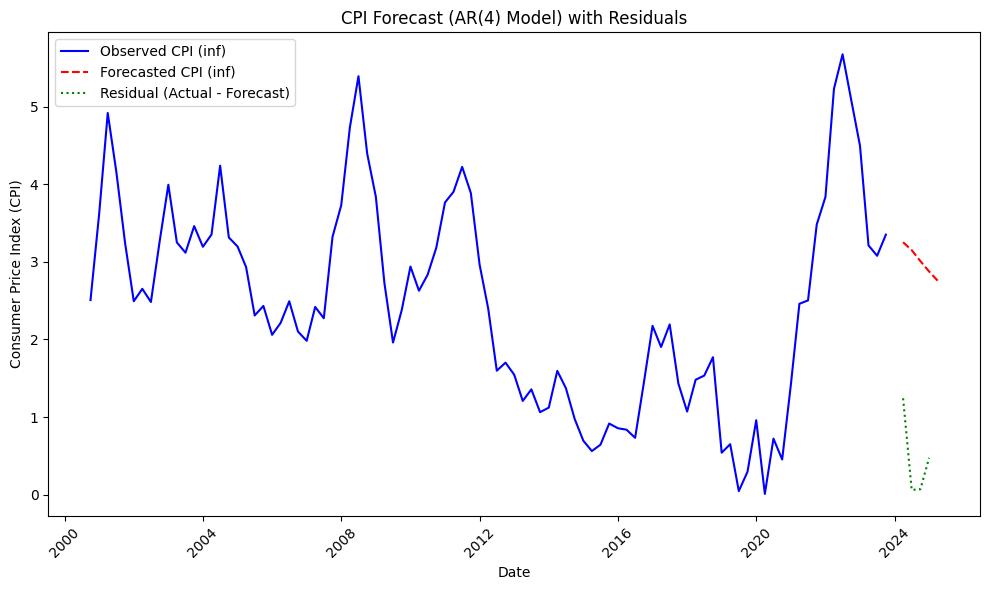

In [15]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# 엑셀 파일에서 'KORmacro' 시트를 데이터프레임으로 읽어오기
file_path = 'python_data.xlsx'  # 파일 경로를 실제 경로로 수정
df = pd.read_excel(file_path, sheet_name='KORmacro')

# 'date' 열을 분기 단위에서 첫 번째 날짜로 변환
def convert_quarter_to_date(quarter):
    year, qtr = quarter.split('/Q')
    month = {'1': '01', '2': '04', '3': '07', '4': '10'}[qtr]
    return f"{year}-{month}-01"

df['date'] = df['date'].apply(convert_quarter_to_date)

# 'date' 열을 datetime 형식으로 변환
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# 'inf' 열에 대해서 AR(4) 모델 추정
model = AutoReg(df['inf'], lags=4)  # lags=4로 AR(4) 모델 지정
model_fitted = model.fit()

# 모델 요약 출력
print(model_fitted.summary())

# 예측을 5단계 향후 시점에 대해 수행
forecast = model_fitted.predict(start=len(df), end=len(df)+4, dynamic=False)

# 예측 결과 출력
print("\nForecasted Values:")
print(forecast)

# 예측 날짜를 정확하게 생성 (5단계 예측)
forecast_dates = pd.date_range(start=df['date'].iloc[-1], periods=6, freq='Q')[1:]

# 실제값과 예측값 차이(residual) 계산
# 실제값을 예측 기간까지 확장하여 residual을 구합니다.
actual_values = df['inf'].iloc[-4:].values  # 가장 마지막 4개 시점의 실제값
residual = actual_values - forecast[:4]  # 예측된 값과 실제값의 차이

# 예측 결과 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['inf'], label='Observed CPI (inf)', color='blue')

# 예측된 CPI 값 그리기 (빨간색 실선)
plt.plot(forecast_dates, forecast, label='Forecasted CPI (inf)', color='red', linestyle='--')

# residual을 초록색 점선으로 그리기
plt.plot(forecast_dates[:4], residual, label='Residual (Actual - Forecast)', color='green', linestyle=':')

# 그래프 제목과 레이블 추가
plt.title('CPI Forecast (AR(4) Model) with Residuals')
plt.xlabel('Date')
plt.ylabel('Consumer Price Index (CPI)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


                            AutoReg Model Results                             
Dep. Variable:                    inf   No. Observations:                   93
Model:                     AutoReg(4)   Log Likelihood                 -71.107
Method:               Conditional MLE   S.D. of innovations              0.538
Date:                Thu, 17 Apr 2025   AIC                            154.215
Time:                        20:34:41   BIC                            169.147
Sample:                             4   HQIC                           160.233
                                   93                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3368      0.131      2.580      0.010       0.081       0.593
inf.L1         1.0822      0.105     10.271      0.000       0.876       1.289
inf.L2        -0.0761      0.149     -0.509      0.6

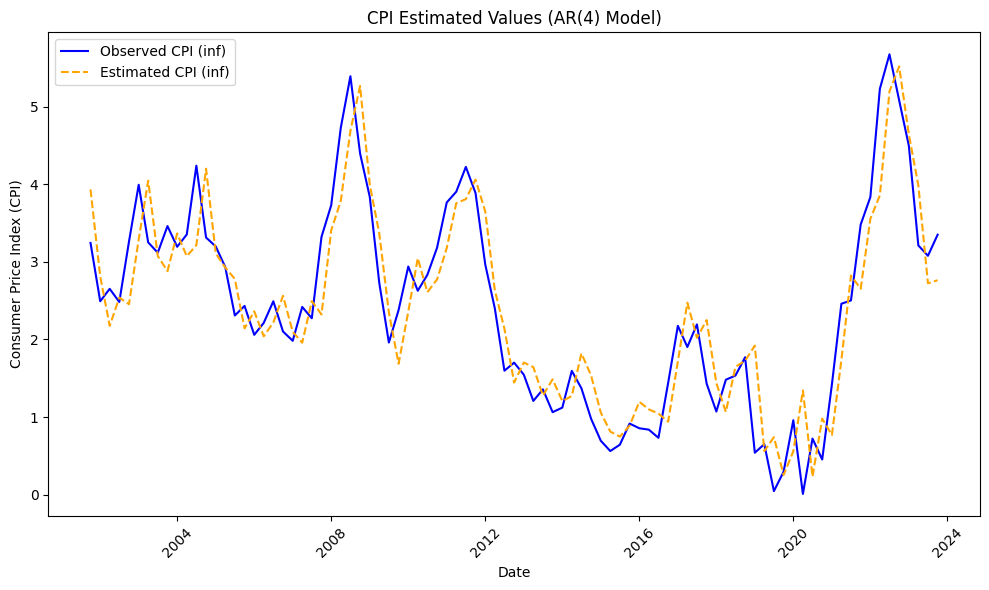

In [27]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# 엑셀 파일에서 'KORmacro' 시트를 데이터프레임으로 읽어오기
file_path = 'python_data.xlsx'  # 파일 경로를 실제 경로로 수정
df = pd.read_excel(file_path, sheet_name='KORmacro')

# 'date' 열을 분기 단위에서 첫 번째 날짜로 변환
def convert_quarter_to_date(quarter):
    year, qtr = quarter.split('/Q')
    month = {'1': '01', '2': '04', '3': '07', '4': '10'}[qtr]
    return f"{year}-{month}-01"

df['date'] = df['date'].apply(convert_quarter_to_date)

# 'date' 열을 datetime 형식으로 변환
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# 'inf' 열에 대해서 AR(4) 모델 추정
model = AutoReg(df['inf'], lags=4)  # lags=4로 AR(4) 모델 지정
model_fitted = model.fit()

# 모델 요약 출력
print(model_fitted.summary())

# 전체 기간에 대한 추정치 계산 (모델 피팅된 값)
estimated_values = model_fitted.fittedvalues

# 첫 4개 값은 NaN이므로, 이를 제외하고 추정치 사용
estimated_values = estimated_values

# 그래프 그리기: 실제값과 추정값
plt.figure(figsize=(10, 6))

# 실제값과 추정치를 그리기
plt.plot(df['date'][4:], df['inf'][4:], label='Observed CPI (inf)', color='blue')
plt.plot(df['date'][4:], estimated_values, label='Estimated CPI (inf)', color='orange', linestyle='--')

# 그래프 제목과 레이블 추가
plt.title('CPI Estimated Values (AR(4) Model)')
plt.xlabel('Date')
plt.ylabel('Consumer Price Index (CPI)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                            AutoReg Model Results                             
Dep. Variable:                    inf   No. Observations:                   93
Model:                     AutoReg(4)   Log Likelihood                 -71.107
Method:               Conditional MLE   S.D. of innovations              0.538
Date:                Thu, 17 Apr 2025   AIC                            154.215
Time:                        20:37:37   BIC                            169.147
Sample:                             4   HQIC                           160.233
                                   93                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3368      0.131      2.580      0.010       0.081       0.593
inf.L1         1.0822      0.105     10.271      0.000       0.876       1.289
inf.L2        -0.0761      0.149     -0.509      0.6

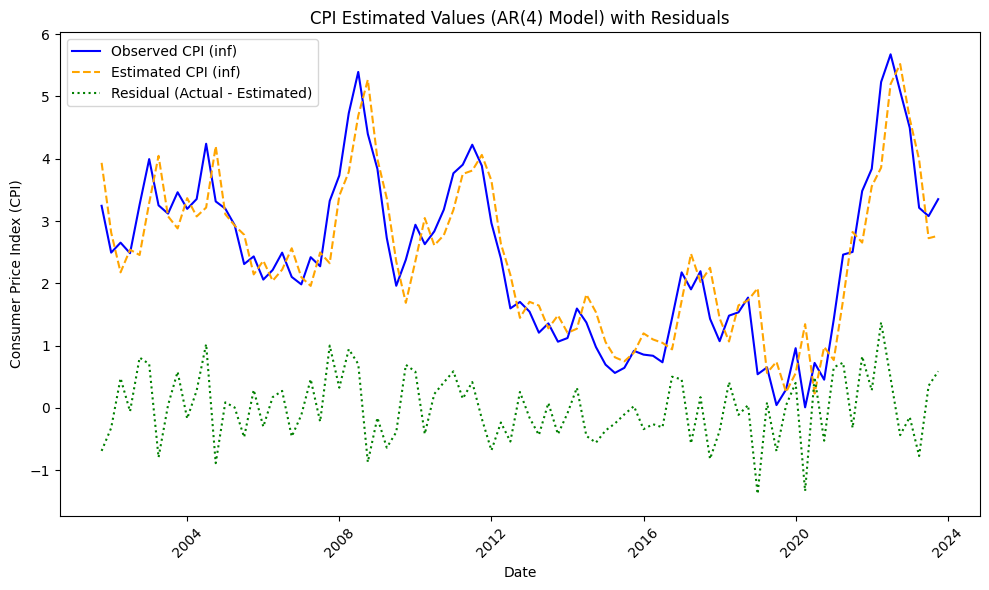

In [31]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# 엑셀 파일에서 'KORmacro' 시트를 데이터프레임으로 읽어오기
file_path = 'python_data.xlsx'  # 파일 경로를 실제 경로로 수정
df = pd.read_excel(file_path, sheet_name='KORmacro')

# 'date' 열을 분기 단위에서 첫 번째 날짜로 변환
def convert_quarter_to_date(quarter):
    year, qtr = quarter.split('/Q')
    month = {'1': '01', '2': '04', '3': '07', '4': '10'}[qtr]
    return f"{year}-{month}-01"

df['date'] = df['date'].apply(convert_quarter_to_date)

# 'date' 열을 datetime 형식으로 변환
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# 'inf' 열에 대해서 AR(4) 모델 추정
model = AutoReg(df['inf'], lags=4)  # lags=4로 AR(4) 모델 지정
model_fitted = model.fit()

# 모델 요약 출력
print(model_fitted.summary())

# 전체 기간에 대한 추정치 계산 (모델 피팅된 값)
estimated_values = model_fitted.fittedvalues

# 잔차 계산 (실제 값과 추정치의 차이)
residuals = df['inf'] - estimated_values

# 그래프 그리기: 실제값, 추정값, 잔차
plt.figure(figsize=(10, 6))

# 실제값과 추정치를 그리기
plt.plot(df['date'][4:], df['inf'][4:], label='Observed CPI (inf)', color='blue')
plt.plot(df['date'][4:], estimated_values, label='Estimated CPI (inf)', color='orange', linestyle='--')

# 잔차를 초록색 점선으로 그리기
plt.plot(df['date'][4:], residuals[4:], label='Residual (Actual - Estimated)', color='green', linestyle=':')

# 그래프 제목과 레이블 추가
plt.title('CPI Estimated Values (AR(4) Model) with Residuals')
plt.xlabel('Date')
plt.ylabel('Consumer Price Index (CPI)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                            AutoReg Model Results                             
Dep. Variable:                    inf   No. Observations:                   93
Model:                     AutoReg(4)   Log Likelihood                 -71.107
Method:               Conditional MLE   S.D. of innovations              0.538
Date:                Thu, 17 Apr 2025   AIC                            154.215
Time:                        20:39:10   BIC                            169.147
Sample:                             4   HQIC                           160.233
                                   93                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3368      0.131      2.580      0.010       0.081       0.593
inf.L1         1.0822      0.105     10.271      0.000       0.876       1.289
inf.L2        -0.0761      0.149     -0.509      0.6

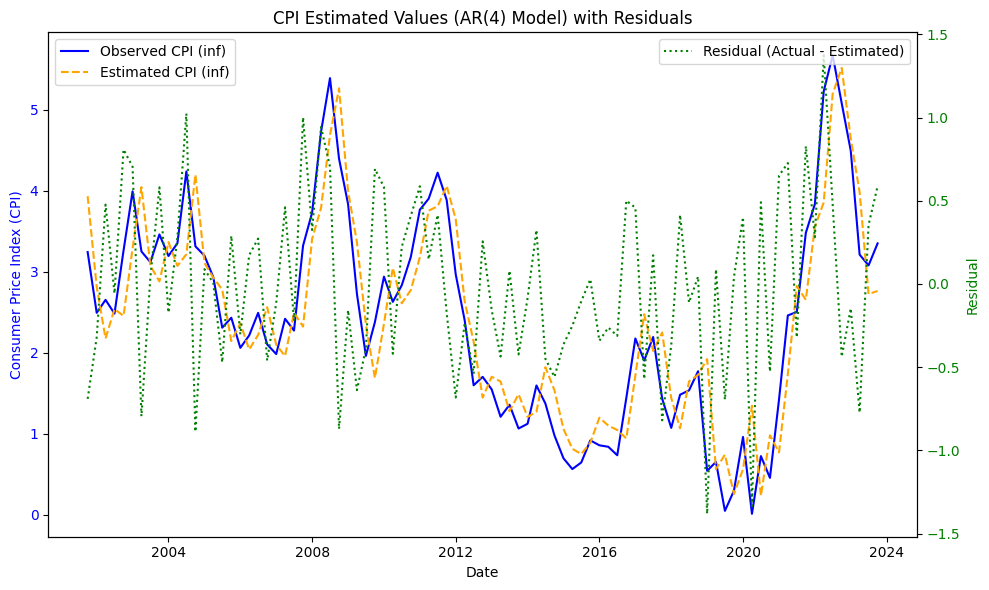

In [32]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# 엑셀 파일에서 'KORmacro' 시트를 데이터프레임으로 읽어오기
file_path = 'python_data.xlsx'  # 파일 경로를 실제 경로로 수정
df = pd.read_excel(file_path, sheet_name='KORmacro')

# 'date' 열을 분기 단위에서 첫 번째 날짜로 변환
def convert_quarter_to_date(quarter):
    year, qtr = quarter.split('/Q')
    month = {'1': '01', '2': '04', '3': '07', '4': '10'}[qtr]
    return f"{year}-{month}-01"

df['date'] = df['date'].apply(convert_quarter_to_date)

# 'date' 열을 datetime 형식으로 변환
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# 'inf' 열에 대해서 AR(4) 모델 추정
model = AutoReg(df['inf'], lags=4)  # lags=4로 AR(4) 모델 지정
model_fitted = model.fit()

# 모델 요약 출력
print(model_fitted.summary())

# 전체 기간에 대한 추정치 계산 (모델 피팅된 값)
estimated_values = model_fitted.fittedvalues

# 잔차 계산 (실제 값과 추정치의 차이)
residuals = df['inf'] - estimated_values

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# 실제값과 추정치를 왼쪽 Y축에 그리기
ax1.plot(df['date'][4:], df['inf'][4:], label='Observed CPI (inf)', color='blue')
ax1.plot(df['date'][4:], estimated_values, label='Estimated CPI (inf)', color='orange', linestyle='--')

# 왼쪽 Y축에 대한 레이블
ax1.set_xlabel('Date')
ax1.set_ylabel('Consumer Price Index (CPI)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 Y축 (우측) 생성
ax2 = ax1.twinx()

# 잔차를 오른쪽 Y축에 초록색 점선으로 그리기
ax2.plot(df['date'][4:], residuals[4:], label='Residual (Actual - Estimated)', color='green', linestyle=':')

# 오른쪽 Y축에 대한 레이블
ax2.set_ylabel('Residual', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 그래프 제목과 레이블 추가
plt.title('CPI Estimated Values (AR(4) Model) with Residuals')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# X축 레이블 회전
plt.xticks(rotation=45)

# 레이아웃 자동 조정
plt.tight_layout()
plt.show()
